# Finding the best chocolate bars

Now let's now move on to the competition and challenge.

## 📖 Background
You work at a specialty foods import company that wants to expand into gourmet chocolate bars. Your boss needs your team to research this market to inform your initial approach to potential suppliers.

After finding valuable chocolate bar ratings online, you need to explore if the chocolate bars with the highest ratings share any characteristics that could help you narrow your search for suppliers (e.g., cacao percentage, bean country of origin, etc.)

## 💾 The data

#### Your team created a file with the following information ([source](https://flavorsofcacao.com)):
- "id" - id number of the review
- "manufacturer" - Name of the bar manufacturer
- "company_location" - Location of the manufacturer
- "year_reviewed" - From 2006 to 2021
- "bean_origin" - Country of origin of the cacao beans
- "bar_name" - Name of the chocolate bar
- "cocoa_percent" - Cocoa content of the bar (%)
- "num_ingredients" - Number of ingredients
- "ingredients" - B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, (Sa) Salt
- "review" - Summary of most memorable characteristics of the chocolate bar
- "rating" - 1.0-1.9 Unpleasant, 2.0-2.9 Disappointing, 3.0-3.49 Recommended, 3.5-3.9 Highly Recommended, 4.0-5.0 Oustanding

***Acknowledgments**: Brady Brelinski, Manhattan Chocolate Society*

## 💪 Challenge
Create a report to summarize your research. Include:

1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality? 
5. [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
7. Summarize your findings.

## Importing Libraries and Data

In [1]:
# Importing the pandas module
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the data
df = pd.read_csv('/content/chocolate_bars.csv')

# Take a look at the first 5 rows of the data
display(df.head())

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


## Data Understanding

In [2]:
df.shape

(2530, 11)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


In [4]:
df.describe()

,id,year_reviewed,cocoa_percent,num_ingredients,rating
count,2530.000000,2530.000000,2530.000000,2443.000000,2530.000000
mean,1429.800791,2014.374308,71.639723,3.041343,3.196344
std,757.648556,3.968267,5.616724,0.913728,0.445321
min,5.000000,2006.000000,42.000000,1.000000,1.000000
25%,802.000000,2012.000000,70.000000,2.000000,3.000000
50%,1454.000000,2015.000000,70.000000,3.000000,3.250000
75%,2079.000000,2018.000000,74.000000,4.000000,3.500000
max,2712.000000,2021.000000,100.000000,6.000000,4.000000


In [5]:
#Creating rating class based on existing criteria
def func(row):
    if (row['rating'] >= 1.0 and row['rating'] < 2.0):
        return 'Unpleasent'
    elif (row['rating'] >= 2.0 and row['rating'] < 3.0):
        return 'Disappointing'
    elif (row['rating'] >= 3.0 and row['rating'] < 3.5):
        return 'Recommended'
    elif (row['rating'] >= 3.5 and row['rating'] < 4.0):
        return 'Highly Recommended'
    else: return 'Outstanding'
    return row['rating']

df['rats'] = df.apply(func, axis=1)

In [6]:
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating,rats
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25,Recommended
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50,Highly Recommended
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75,Highly Recommended
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00,Recommended
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00,Recommended


In [7]:
#Checking the missing values
df.isnull().sum()

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
rats                 0
dtype: int64

In [8]:
#Removing the missing values
df.dropna(inplace=True)

## Exploratory Data Analysis (EDA)

### What is the average rating by country of origin?

- we will look at the top 10 countries that have the highest and lowest rating averages

In [16]:
high_rat_country = df.groupby('bean_origin')[['rating']].mean().sort_values('rating',ascending=False)[0:10]
print('Top 10 Highest Rating Country Origin :')
display(high_rat_country.head(10))

low_rat_country = df.groupby('bean_origin')[['rating']].mean().sort_values('rating')
print('Top 10 Lowest Rating Country Origin :')
display(low_rat_country.head(10))

Top 10 Highest Rating Country Origin :


,rating
bean_origin,
China,3.500000
Sao Tome & Principe,3.500000
Solomon Islands,3.450000
Congo,3.318182
Thailand,3.300000
Cuba,3.291667
Vietnam,3.287671
Papua New Guinea,3.280612
Madagascar,3.270468


Top 10 Lowest Rating Country Origin :


,rating
bean_origin,
Puerto Rico,2.714286
Martinique,2.750000
St.Vincent-Grenadines,2.750000
Sierra Leone,2.750000
Principe,2.750000
Ivory Coast,2.833333
Taiwan,2.875000
Sri Lanka,2.875000
Nigeria,2.875000


- Based on the table above, China, Sao Tome & Principe, and Solomon Islands are the 3 countries that have the highest average. However, the average value of this high rating could be due to a few reviews so that the score becomes high.

### How many bars were reviewed for each of those countries?

In [17]:
tot_review = df.groupby(['bean_origin']).agg({'id':'count'}).sort_values('id', ascending=False).rename(columns={'id':'total_review'}).reset_index()
top10_tot_review = tot_review.head(10)
print('Top 10 Highest Reviews Country Origin = ')
display(top10_tot_review.head(10))
print('Top 10 Lowest Reviews Country Origin = ')
display(tot_review.tail(10))

Top 10 Highest Reviews Country Origin = 


,bean_origin,total_review
0,Venezuela,246
1,Peru,231
2,Dominican Republic,220
3,Ecuador,201
4,Madagascar,171
5,Blend,144
6,Nicaragua,100
7,Bolivia,79
8,Tanzania,78
9,Colombia,78


Top 10 Lowest Reviews Country Origin = 


,bean_origin,total_review
52,Gabon,1
53,DR Congo,1
54,Martinique,1
55,China,1
56,Tobago,1
57,Suriname,1
58,Sumatra,1
59,Sulawesi,1
60,St.Vincent-Grenadines,1
61,Principe,1


### Which countries that generated BOTH the highest average rating and review?

In [18]:
both_high = high_rat_country.merge(top10_tot_review, on='bean_origin', how='inner')
both_high

,bean_origin,rating,total_review
0,Madagascar,3.270468,171


- Now, we can see country that has both the highest rating and the most number of reviews is Madagascar.

### Visualization of findings for questions 1 and 2.

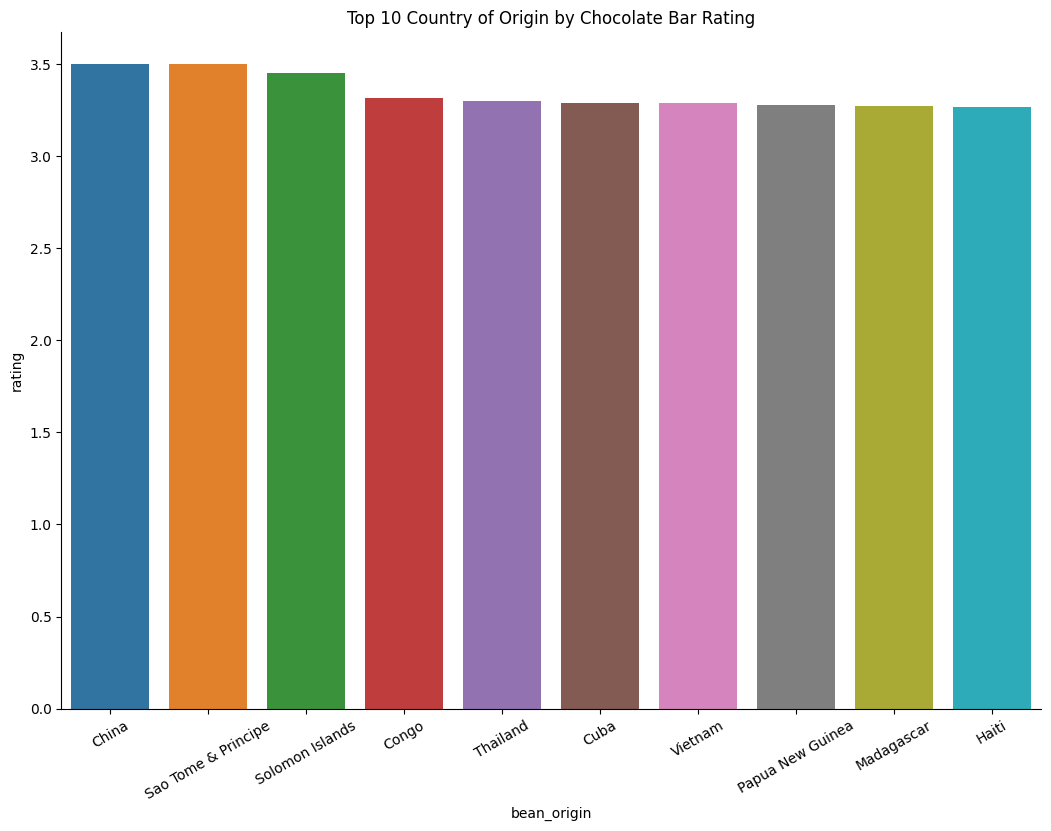

In [20]:
high_rats_country = df.groupby('bean_origin')[['rating']].mean().reset_index().sort_values('rating', ascending = False).head(10)
high_rat_country = pd.DataFrame(high_rats_country)

plt.style.use('default')
sns.catplot(x= "bean_origin", y = 'rating', data = high_rat_country, kind = "bar", height = 7.5, aspect = 11.7/8.27)
plt.xticks(rotation=30)
plt.title('Top 10 Country of Origin by Chocolate Bar Rating')
plt.show()

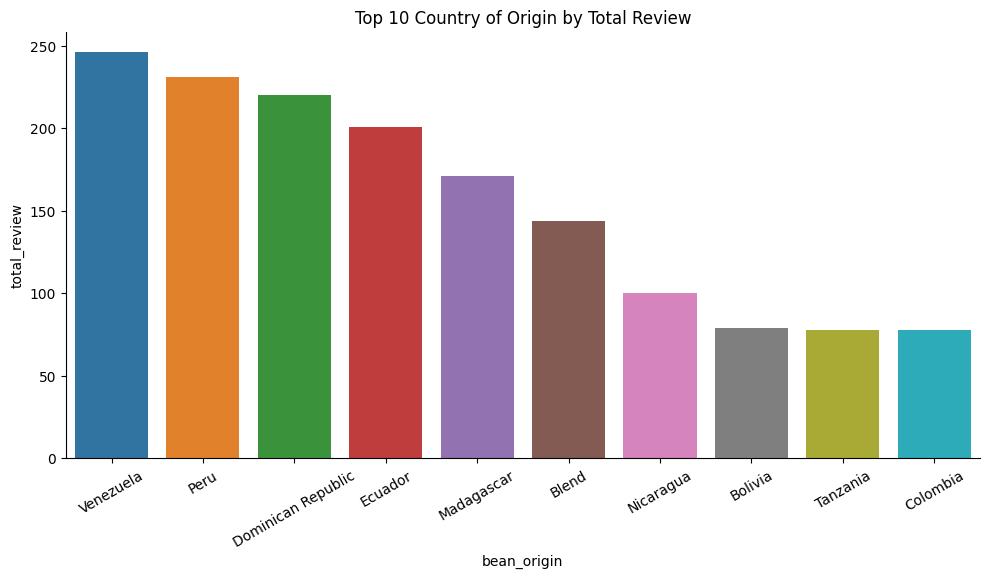

In [ ]:
tot_review_top10 = tot_review[0:10]

sns.catplot(x='bean_origin', y='total_review', data = tot_review_top10, kind="bar", aspect=2)
plt.title('Top 10 Country of Origin by Total Review')
plt.xticks(rotation=30)
plt.show()

### Is the cacao bean's origin an indicator of quality?

- Cacao solids deliver the chocolatey taste that the chocolate has. On average, all chocolates have at least 50% Cacao solids. Anything below this is termed as bad quality. Dark chocolates have a minimum of 75% of Cacao solids. This is the reason why they are generally more expensive than the others and also taste finer.

In [ ]:
cocoa_rat_data = df.groupby('bean_origin')[['cocoa_percent','rating']].mean().sort_values(['cocoa_percent','rating'], ascending=False)
above_50per = cocoa_rat_data[cocoa_rat_data['cocoa_percent']>=50]
print('Countries with cocoa percent above 50%')
above_50per

Countries with cocoa percent above 50%


,cocoa_percent,rating
bean_origin,,
Samoa,82.333333,3.083333
Principe,77.000000,2.750000
Gabon,75.000000,3.250000
Cuba,74.333333,3.291667
Belize,72.932432,3.243243
...,...,...
U.S.A.,68.709677,3.217742
Puerto Rico,68.285714,2.714286
DR Congo,68.000000,3.000000


We can see that 61 bean origin countries that has a high quality chocolate beans

### How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?

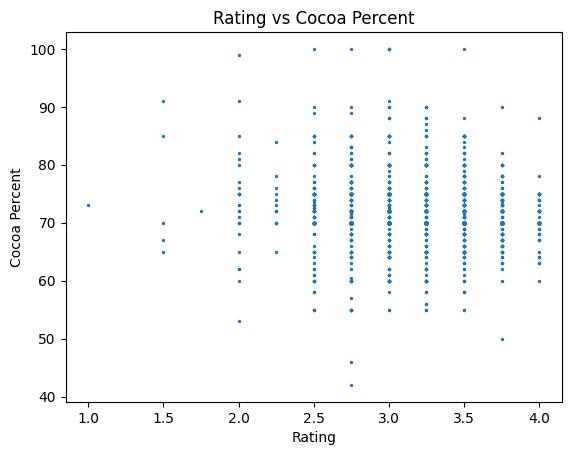

In [ ]:
plt.scatter( x=df['rating'], y=df['cocoa_percent'], s=2)
plt.xlabel("Rating")
plt.ylabel("Cocoa Percent")
plt.title("Rating vs Cocoa Percent")
plt.show()

In [ ]:
higher_rating = df[df['rating']>3.5]
avg_high_rating = higher_rating['cocoa_percent'].mean(axis=0)
print('Cocoa percent average for high rating chocolate bars:', avg_high_rating)

lower_rating = df[df['rating']<3.5]
avg_low_rating = lower_rating['cocoa_percent'].mean(axis=0)
print('Cocoa percent average for low rating chocolate bars:', avg_low_rating)

Cocoa percent average for high rating chocolate bars: 70.99630541871922
Cocoa percent average for low rating chocolate bars: 71.73299663299663


In [ ]:
below_rat = lower_rating['cocoa_percent']
above_rat = higher_rating['cocoa_percent']
mean_diff = above_rat.mean() - below_rat.mean()
print('Cocoa percent difference:', mean_diff)

Cocoa percent difference: -0.736691214277414


- Chocolate bar with higher rating (>3.5) have a lower cocoa percentage average than the lower rating chocolate bar (<3.5) with differences around 0.7%. To get a feeling for the uncertainty around how much percent cocoa with higher rating diffrences than the lower rating, we could look at a confidence interval (here calculated using the bootstrap method).


In [ ]:
# A bootstrap analysis of the cocoa percent difference beetwen higer rating and lower rating chocolate bars
boot_mean_diff = []
for i in range(5000):
    boot_above = above_rat.sample(frac=1, replace=True)
    boot_below = below_rat.sample(frac=1, replace=True)
    boot_mean_diff.append( boot_above.mean() - boot_below.mean() )

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -1.181588
0.975   -0.283764
dtype: float64

So chocolate with > 3.5 rating has lower cocoa percent between 0.2% and 1.2% percentage points, according to a 95% confidence interval. All in all, it would seem that the difference is very small. This can also be seen from the distribution of cocoa percent with ratings > 3.5 and < 3.5, which are both aggregated at the percent cocoa value of 65-85%. In addition, data on ratings < 2 are rarely found because the majority of people in the data give ratings > 2.


- For this case, The hypothesis is that cocoa percent for lower rating chocolate will be more likely to have a higher rating than the higher cocoa percent than the chocolate bars with higher rating. So that the null and alternate hypotheses are as follows:

**Null Hypothesis** = The percentage of cocoa in higher rating chocolate bars is greater than in lower rating chocolate.

**Alternate Hypothesis** = The percentage of cocoa in a higher rating chocolate bars is no greater than lower rating chocolate.

The significance threshold we will set as the benchmark to either accept or fail to reject the null hypothesis will be:

𝛼 = 0.05

To check whether the difference is statistically significant or not, we can use the **mannwhitneyu**.

In [ ]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(higher_rating['cocoa_percent'], lower_rating['cocoa_percent'], alternative='greater')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  	print('A is not greater than B')
else:
	  print('A greater than B')

stat=270803.500, p=0.999
Probably the same distribution


Based on the results, The p-value of the test comes out to be equal 0.99, which is greater than the significance level alpha (that is, 0.05). This implies that we can say that the cocoa percent of higher rating chocolate bars distribution is not greater than the cocoa percent of lower rating chocolate bars. 

### Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).

In [ ]:
data_L = df[df['ingredients'].str.contains('L')==True]['rating']
data_no_L = df[df['ingredients'].str.contains('L')==False]['rating']
dat = df[df['ingredients'].str.contains('L')==True]['rating'].mean()
dit = df[df['ingredients'].str.contains('L')==False]['rating'].mean()
print('Average rating for chocolate bars with Lecithin:', dat)
print('Average rating for chocolate bars without Lecithin:', dit)

Average rating for chocolate bars with Lecithin: 3.150608519269777
Average rating for chocolate bars without Lecithin: 3.2251282051282053


In [ ]:
mean_diff = data_no_L.mean() - data_L.mean()
mean_diff

0.07451968585842828

In [ ]:
# A bootstrap analysis of the average rating difference beetwen chocolate bars contains Lechitin and doesn't contain Lechitin
boot_mean_diff = []
for i in range(5000):
    boot_L = data_L.sample(frac=1, replace=True)
    boot_no_L = data_no_L.sample(frac=1, replace=True)
    boot_mean_diff.append( boot_no_L.mean() - boot_L.mean() )

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025    0.029794
0.975    0.120126
dtype: float64

So, chocolate bars without Lechitin have a higher average rating by between 0.03 and 0.1 points, according to a 95% confidence interval.

- To check whether the difference is statistically significant or not, we can use the **mannwhitneyu**.

In [ ]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(data_L, data_no_L, alternative='two-sided')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=443590.500, p=0.007
Probably different distributions


Based on the results, The p-value of the test comes out to be equal to 0.007, which is lower than the significance level alpha (that is, 0.05). This implies that we can say that the chocolate bars rating with lechitin distribution is statistically different from the average chocolate bars rating without lechitin. 

- Although statistically significant, the difference is **not practical significant** because the difference in the rating of chocolate bars with Lechitin and without Lechitin does not have a large enough effect to be meaningful in this cases.

## Summary 

- High ratings chocolate bars tend to contain a fairly high cocoa percent, around 60% - 85%. In addition, chocolate with a high rating is chocolate whose cocoa beans come from Tobago, China, Sao Tome, and Madagascar. Especially Madagascar because it has a high rating as well as a large number of reviews.